# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


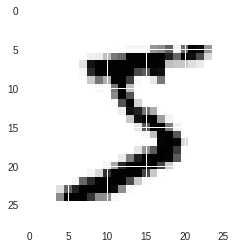

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
#model.add(Convolution2D(10, 1, activation='relu'))
#model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(Convolution2D(32, (2, 2), activation='relu'))
model.add((MaxPooling2D(pool_size=2, strides=None, padding='Valid')))
#model.add((MaxPooling2D(pool_size=2, strides=None, padding='Valid')))
model.add(Convolution2D(32, (3, 3), activation='relu'))
#model.add(Convolution2D(24, 1, activation='relu'))
#model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 10))
model.add(Flatten())
model.add(Activation('softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_165 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_166 (Conv2D)          (None, 25, 25, 32)        4128      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_167 (Conv2D)          (None, 10, 10, 32)        9248      
_________________________________________________________________
conv2d_168 (Conv2D)          (None, 10, 10, 10)        330       
_________________________________________________________________
conv2d_169 (Conv2D)          (None, 1, 1, 10)          10010     
_________________________________________________________________
flatten_29 (Flatten)         (None, 10)                0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=512, epochs=20, verbose=1)

Epoch 1/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.6267 - acc: 0.8348
Epoch 2/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.1301 - acc: 0.9624
Epoch 3/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0899 - acc: 0.9736
Epoch 4/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0720 - acc: 0.9785
Epoch 5/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0608 - acc: 0.9818
Epoch 6/20
14848/60000 [======>.......................] - ETA: 3s - loss: 0.0502 - acc: 0.9844

60000/60000 [==============================] - 4s 68us/step - loss: 0.0531 - acc: 0.9837
Epoch 7/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0455 - acc: 0.9860
Epoch 8/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0422 - acc: 0.9873
Epoch 9/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0377 - acc: 0.9889
Epoch 10/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0351 - acc: 0.9893
Epoch 11/20
23040/60000 [==========>...................] - ETA: 2s - loss: 0.0291 - acc: 0.9910

60000/60000 [==============================] - 4s 68us/step - loss: 0.0318 - acc: 0.9900
Epoch 12/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0292 - acc: 0.9908
Epoch 13/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0282 - acc: 0.9910
Epoch 14/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0273 - acc: 0.9913
Epoch 15/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0238 - acc: 0.9927
Epoch 16/20
25088/60000 [===========>..................] - ETA: 2s - loss: 0.0224 - acc: 0.9935

60000/60000 [==============================] - 4s 67us/step - loss: 0.0223 - acc: 0.9929
Epoch 17/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.0194 - acc: 0.9941
Epoch 18/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0185 - acc: 0.9946
Epoch 19/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0173 - acc: 0.9946
Epoch 20/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0165 - acc: 0.9947


In [0]:
score = model.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 2s 174us/step


In [0]:
print(score)

[0.03728000354768301, 0.9897]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.5375015e-13 1.4939302e-11 2.9863248e-10 1.4163889e-05 1.4254854e-15
  2.3542067e-12 1.0808758e-22 9.9998581e-01 6.4243978e-11 2.1131651e-08]
 [1.2516008e-08 7.0042995e-07 9.9999928e-01 4.8141924e-12 2.9116251e-19
  1.3904657e-15 3.8689990e-08 1.5061154e-15 1.1761358e-08 2.1050610e-14]
 [1.0547569e-07 9.9995780e-01 2.1304047e-06 5.9828528e-07 7.2113494e-06
  3.5470731e-07 3.1720978e-07 2.8139921e-05 3.2707119e-06 5.2426014e-08]
 [1.0000000e+00 2.6367248e-19 6.3728124e-12 2.9918900e-15 6.3941554e-16
  8.0528509e-13 1.5308848e-08 4.1080548e-13 9.7154825e-13 4.2724830e-13]
 [4.7828525e-12 3.8686645e-12 9.4704184e-12 6.1267316e-14 9.9999881e-01
  2.9249875e-12 1.5600297e-11 3.7431738e-07 1.0761230e-08 8.0929470e-07]
 [9.8464037e-09 9.9986792e-01 6.8932138e-08 6.5124217e-09 8.0996206e-06
  1.4836952e-09 8.2204638e-10 1.2299910e-04 7.5967694e-07 7.3946623e-08]
 [8.6411540e-15 1.0362783e-10 6.2148748e-09 9.6927223e-12 9.9995434e-01
  3.6610115e-07 6.3894318e-14 1.0779229e-06 1.4612524e-05 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

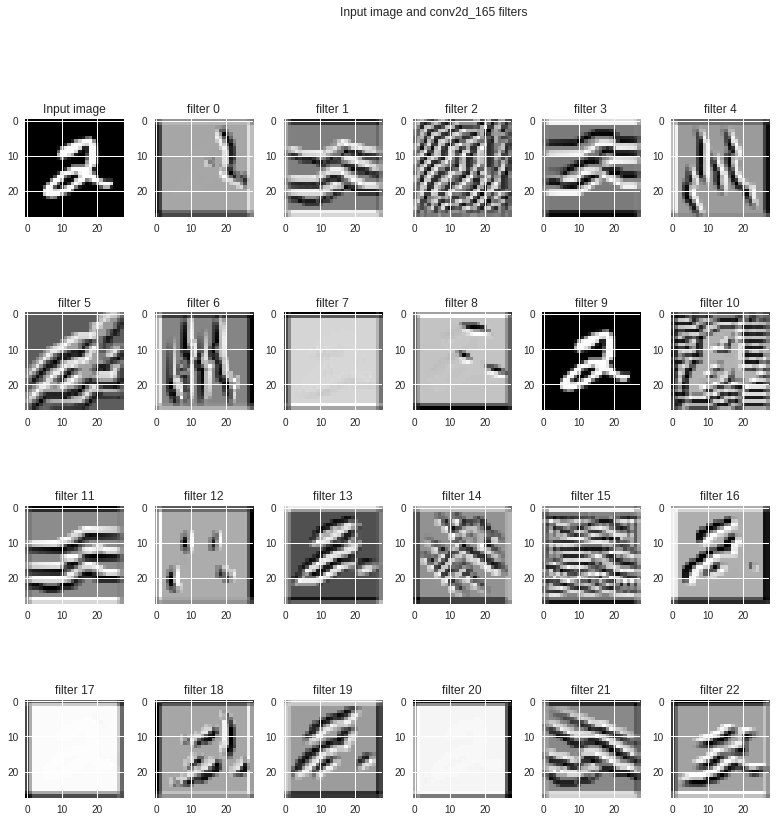

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[5]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_165'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()